## **PUTRI NUR AINI MAHFUDZ (M203Y0411)**

## **Proyek Akhir Kelas Machine Learning Terapan**

---


## **Latar Belakang**

Di zaman digital ini, hal yang menjadi tuntutan perkembangan globalisasi adalah literasi. Kemajuan zaman dan cara berliterasi harus seimbang. Terutama bagi generasi mellenial atau yang dikenal sebagai generasi digital. Di era digital harus memberikan sumbangan berupa kesadaran akan pentingnya pengetahuan yang mendalam.

Pada zaman yang dipenuhi oleh penerapan teknologi ini harusnya dapat lebih mudah dan cepat dalam meningkatan budaya literasi di setiap tempat, salah satunya dengan membaca buku melalui perpustakaan online. Agar user memiliki pengalaman pengguna yang baik dalam menggunakan perpustakaan online, maka perlu  diterapkan salah satu hasil produk dari *machine learning* yaitu sistem rekomendasi untuk memudahkan user memilih buku yang diminati untuk dibaca.

Oleh karena itu, saya berniat untuk membuat sistem rekomendasi buku yang kelak bisa diterapkan pada aplikasi semacam perpustakaan online.

## **Bussiness Understanding**

### Problem Statements
Berdasarkan latar belakang di atas, berikut ini rumusan masalah yang dapat diselesaikan pada proyek ini:
- Bagaimana cara melakukan pengolahan data pada dataset Books.csv, Ratings.csv, dan Users.csv agar dapat digunakan pada model *machine learning*?
- Bagaimana cara membuat model *machine learning* untuk merekomendasikan buku dengan menggunakan *collaborative filtering*?

### Goals
Tujuan dari proyek ini adalah:
- Mengetahui cara melakukan pengolahan terhadap dataset Books.csv, Ratings.csv, dan Users.csv.
- Mengetahui cara membuat model *machine learning* untuk merekomendasikan buku dengan menggunakan *collaborative filtering*.

### Solution Statements
Pada proyek ini, saya akan membuat sistem rekomendasi dengan menggunakan *collaborative filtering*.

*Collaborative Filtering* adalah sebuah metode yang merekomendasikan item berdasarkan kemiripan user dalam hal memilih atau memberi nilai kepada item.

Kelebihan dari metode ini adalah hasil rekomendasi yang beragam dan bersifat relevan dan baru, sedangkan kekurangan dari metode ini yaitu tidak dapat menghasilkan rekomendasi dikarenakan tidak adanya informasi preferensi untuk pengguna baru dan item baru *(cold-start problem)*.

### Impor library yang dibutuhkan

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## **Data Understanding**

Dalam dataset ini terdapat 3 file csv, di antaranya:
1. Books.csv

  Penjelasan mengenai variabel yang ada pada dataset Books.csv adalah sebagai berikut: 

  - ISBN: merupakan kode ISBN dari buku
  - Book-Title: merupakan judul dari buku
  - Book-Author: merupakan author atau penulis dari buku
  - Year-Of-Publication: merupakan tahun terbit dari buku  
  - Publisher: merupakan publisher atau penerbit dari buku  
  - Image-URL-S: merupakan URL yg menunjukkan foto buku berukuran small
  - Image-URL-M: merupakan URL yg menunjukkan foto buku berukuran medium
  - Image-URL-L: merupakan URL yg menunjukkan foto buku berukuran large


2. Ratings.csv

  Penjelasan mengenai variabel yang ada pada dataset Ratings.csv adalah sebagai berikut:

  - User-ID: merupakan id dari user
  - ISBN: merupakan kode ISBN dari buku
  - Book-Rating: merupakan rating buku yang diberikan user (rentang 1-10)


3. Users.csv

   Penjelasan mengenai variabel yang ada pada dataset Users.csv adalah sebagai berikut:

  - User-ID: merupakan id dari user
  - Location: merupakan lokasi dari user
  - Age: merupakan usia atau umur dari user

### Load dataset

In [68]:
Books = pd.read_csv('/content/Books.csv')
Ratings = pd.read_csv('/content/Ratings.csv')
Users = pd.read_csv('/content/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Melihat isi dataset books

In [69]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Eksplorasi dataset books

In [70]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Melihat isi dataset ratings

In [71]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Eksplorasi dataset ratings

In [72]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Melihat isi dataset users

In [73]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Eksplorasi dataset users

In [74]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## **Data Preparation**

### Menggabungkan dataset books, ratings, dan users

In [75]:
df1=Books.merge(Ratings,how="left", on="ISBN")
df_=df1.merge(Users,how="left", on="User-ID")

df=df_.copy()
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


### Melihat jumlah baris dan kolom pada dataset yang telah digabungkan

In [76]:
df.shape

(1032345, 12)

### Melihat jumlah data kosong pada setiap kolom

In [77]:
df.isna().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                  1209
Book-Rating              1209
Location                 1209
Age                    279044
dtype: int64

### Mengecek apakah ada data yang terduplikat

In [78]:
duplicates = df[df.duplicated()]
len(duplicates)

0

### Visualisasi distribusi rating buku

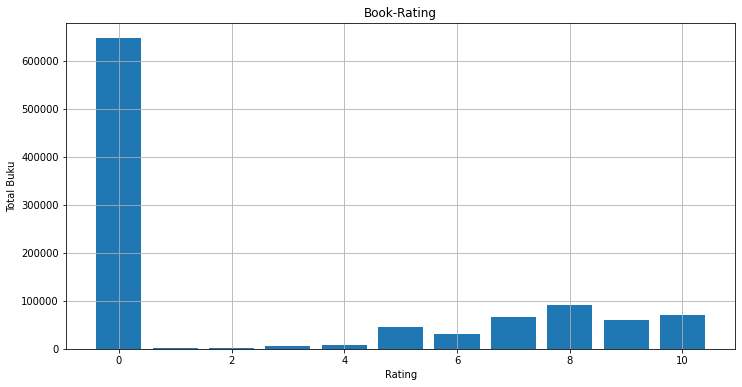

In [79]:
rating_counter = df.groupby('Book-Rating').count()
plt.figure(figsize=(12,6))
plt.title('Book-Rating')
plt.xlabel('Rating')
plt.ylabel('Total Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

### Menghapus kategori yang tidak diperlukan pada kolom  

Kategori yang dihapus adalah rating dengan nilai 0 pada variable Book-Rating. Alasan ketegori ini dihapus adalah karena menyebabkan data rating tidak seimbang.

In [80]:
Ratings.shape

(1149780, 3)

In [81]:
Ratings.drop(Ratings[Ratings["Book-Rating"] == 0].index, inplace=True)
Ratings.shape

(433671, 3)

### Visualisasi distribusi rating buku yang sudah ditangani data tidak seimbangnya

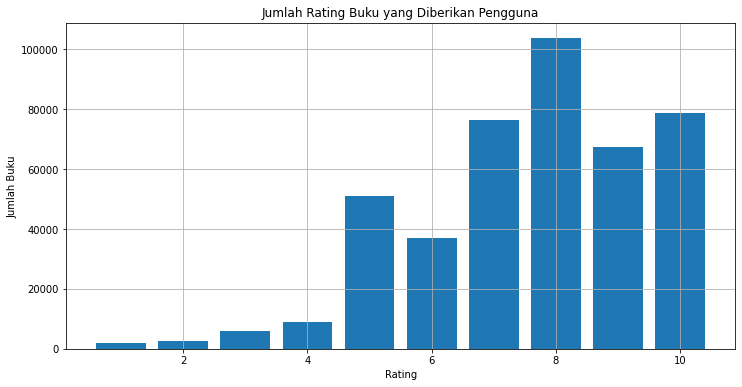

In [82]:
rating_counter = Ratings.groupby('Book-Rating').count()
plt.figure(figsize=(12,6))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

### Menghapus data yang mempunyai nilai null

In [16]:
all_book_clean = df.dropna()
all_book_clean

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0,"toronto, ontario, canada",30.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526.0,0.0,"victoria, british columbia, canada",36.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054.0,0.0,"ottawa, ontario, canada",29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0,"providence, rhode island, usa",26.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0,"orem, utah, usa",12.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0,"hopewell junction, new york, usa",55.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0,"hopewell junction, new york, usa",55.0


### Melihat data apakah masih ada kolom bernilai null atau tidak

In [19]:
all_book_clean.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

### Melakukan Encoding

Menyandikan (encode) fitur ‘User-ID’ ke dalam indeks integer.

In [35]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = Ratings['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)
 
# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276832, 276835, 276837, 276842, 276847, 276848, 276850, 276853, 276854, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277065, 277072, 277074, 277079, 277085, 277087, 277090, 277094, 277096, 277107, 277109, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 

Menyandikan (encode) fitur ‘ISBN’ ke dalam indeks integer.

In [36]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_list = Ratings['ISBN'].unique().tolist()
 
# Melakukan proses encoding placeID
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_list)}
 
# Melakukan proses encoding angka ke placeID
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_list)}

Memetakan ‘User-ID’ dan ‘ISBN’ ke dataframe yang berkaitan.

In [37]:
# Mapping User-ID ke dataframe user
Ratings['user'] = Ratings['User-ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
Ratings['book'] = Ratings['ISBN'].map(isbn_to_isbn_encoded)

Mengecek beberapa hal dalam data seperti jumlah user, jumlah isbn, kemudian mengubah nilai rating menjadi float.

In [63]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah isbn
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)
 
# Mengubah rating menjadi nilai float
all_book_clean['Book-Rating'] = all_book_clean['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum Book-Rating
min_rating = min(all_book_clean['Book-Rating'])
 
# Nilai maksimal Book-Rating
max_rating = max(all_book_clean['Book-Rating'])
 
print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))

77805
185973
Number of User: 77805, Number of ISBN: 185973, Min Rating: 1.0, Max Rating: 10.0


### Melakukan Pengacakan Data

In [41]:
# Mengacak dataset
all_book_clean = Ratings.sample(frac=1, random_state=42)
all_book_clean

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,8,9713,1013
211411,49144,8422641127,5,14390,54663
647520,156424,3442453844,7,44370,127953
30124,7125,0060586125,8,2587,10359
1052982,251606,0316789844,8,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7,45235,70428
958724,231613,0747542333,5,65186,33018
335707,79923,0440206154,8,22993,6822
373697,89610,8880891960,5,25753,84887


### Membagi dataset

Memetakan (mapping) data user dan book menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.


Setelah itu bagi dataset. 80% untuk data train, dan 20% untuk data validasi.

In [43]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = all_book_clean[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = all_book_clean['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * all_book_clean.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


### Membangun Model

Pada tahap ini, model menghitung skor kecocokan antara user dan ISBN dengan teknik embedding.

Pertama, kita melakukan proses embedding terhadap data user dan ISBN. 

kemudian melakukan operasi perkalian dot product antara embedding user dan ISBN. 

Selain itu, dapat juga menambahkan bias untuk setiap user dan ISBN. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Membuat class RecommenderNet dengan keras Model class.

In [44]:
class RecommenderNet(tf.keras.Model):
 
      # Insialisasi fungsi
      def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_isbn = num_isbn
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.book_embedding = layers.Embedding( # layer embeddings book
            num_isbn,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_isbn, 1) # layer embedding book bias
    
      def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
    
        dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
    
        x = dot_user_book + user_bias + book_bias
        
        return tf.nn.sigmoid(x) # activation sigmoid

Melakukan proses compile terhadap model

In [54]:
        model = RecommenderNet(num_users, num_isbn, 50) # inisialisasi model

        # model compile
        model.compile(
            loss = tf.keras.losses.BinaryCrossentropy(),
            optimizer = keras.optimizers.Adam(learning_rate=0.001),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam sebagai optimizer, dan RMSE sebagai metrics evaluation.

### Melatih Model

In [57]:
        # Memulai training
        
        history = model.fit(
            x = x_train,
            y = y_train,
            batch_size=64,
            epochs = 10,
            validation_data = (x_val, y_val)
        )

Epoch 1/10
5421/5421 [==============================] - 621s 115ms/step - loss: 0.5786 - root_mean_squared_error: 0.1984 - val_loss: 0.6087 - val_root_mean_squared_error: 0.2274
Epoch 2/10
5421/5421 [==============================] - 621s 115ms/step - loss: 0.5767 - root_mean_squared_error: 0.1926 - val_loss: 0.6069 - val_root_mean_squared_error: 0.2233
Epoch 3/10
5421/5421 [==============================] - 621s 115ms/step - loss: 0.5818 - root_mean_squared_error: 0.1945 - val_loss: 0.6192 - val_root_mean_squared_error: 0.2339
Epoch 4/10
5421/5421 [==============================] - 623s 115ms/step - loss: 0.5882 - root_mean_squared_error: 0.1989 - val_loss: 0.6208 - val_root_mean_squared_error: 0.2337
Epoch 5/10
5421/5421 [==============================] - 616s 114ms/step - loss: 0.5953 - root_mean_squared_error: 0.2032 - val_loss: 0.6249 - val_root_mean_squared_error: 0.2363
Epoch 6/10
5421/5421 [==============================] - 613s 113ms/step - loss: 0.6046 - root_mean_squared_err

### Evaluation

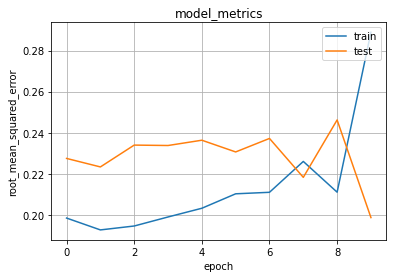

In [58]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

### Membuat variabel book_unread sebagai daftar buku untuk direkomendasikan pada user

Variabel book_unread diperoleh dengan menggunakan operator bitwise (~) pada variabel book_read_by_user

In [64]:
books_df = Books
df = pd.read_csv('/content/Ratings.csv')
 
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_unread = books_df[~books_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_unread = list(
    set(book_unread)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)
 
book_unread = [[isbn_to_isbn_encoded.get(x)] for x in book_unread]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_unread), book_unread)
)

Untuk memperoleh rekomendasi restoran, gunakan fungsi model.predict() dari library Keras 

In [65]:
Ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = Ratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    isbn_encoded_to_isbn.get(book_unread[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Books with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row._3, "-", row._2)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_isbns)]
for row in recommended_books.itertuples():
    print(row._3, "-", row._2)

4654/4654 [==============================] - 5s 1ms/step
Showing recommendations for users: 142524
Books with high ratings from user
--------------------------------
George Saunders - The Very Persistent Gappers of Frip
JULIAN GOUGH - Juno and Juliet
DOUGLAS ADAMS - The Salmon of Doubt: Hitchhiking the Galaxy One Last Time
Cristina Bjork - The Other Alice : The Story of Alice Liddell and Alice in Wonderland
T. S. Eliot - The Waste Land and Other Poems
--------------------------------
Top 10 book recommendation
--------------------------------
J.R.R. TOLKIEN - The Two Towers (The Lord of the Rings, Part 2)
J.R.R. TOLKIEN - The Fellowship of the Ring (The Lord of the Rings, Part 1)
J.R.R. TOLKIEN - The Return of the King (The Lord of the Rings, Part 3)
J. K. Rowling - Harry Potter and the Order of the Phoenix (Book 5)
J. R. R. Tolkien - The Two Towers (The Lord of the Rings, Part 2)
Shel Silverstein - The Giving Tree
Bill Watterson - Calvin and Hobbes
Jodi Picoult - My Sister's Keeper : 

## **Terimakasih.**

## **Submission project kelas Machine Learning Terapan - 2022** 